# 시각화 복습 퀴즈

## 퀴즈 1: (Seaborn: regplot + scatterplot)

df_tips 데이터를 사용하여, 하나의 ax에 두 개의 그래프를 겹쳐 그리세요.

'total_bill' (x축)과 'tip' (y축)의 2차 다항식(order=2) 회귀선(regplot)을 그리세요. (신뢰구간 ci=None 설정)

똑같은 ax에 산점도(scatterplot)를 겹쳐 그리는데, 'smoker'(흡연 여부)에 따라 색(hue)을, 'time'(시간)에 따라 모양(style)을 다르게 표시하세요.

<Axes: xlabel='total_bill', ylabel='tip'>

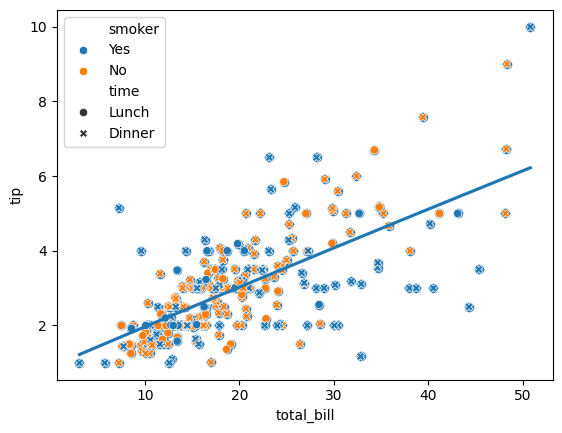

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_tips = sns.load_dataset('tips')
df_tips

fig, ax = plt.subplots()
sns.regplot(x='total_bill', y='tip', data=df_tips, order=2, ax=ax, ci=None)
sns.scatterplot(x='total_bill', y='tip', data=df_tips, ax=ax, hue='smoker', style='time')

## 퀴즈 2: (Seaborn: boxplot + order + stripplot)

문제: df_tips 데이터를 사용하여, '요일(day)'별 '총 결제액(total_bill)'을 비교하는 '박스 플롯'을 그리세요.

x축의 순서(order)가 '월화수목'이 아닌, 'Thu', 'Fri', 'Sat', 'Sun' 순서가 되도록 day_order 리스트를 만들고 적용하세요.

sns.boxplot을 그리세요.

박스 플롯 위에 sns.stripplot을 겹쳐 그려서, 실제 데이터 분포를 점으로 함께 표시하세요. (점이 너무 진하지 않게 alpha=0.5 설정)

<Axes: xlabel='day', ylabel='total_bill'>

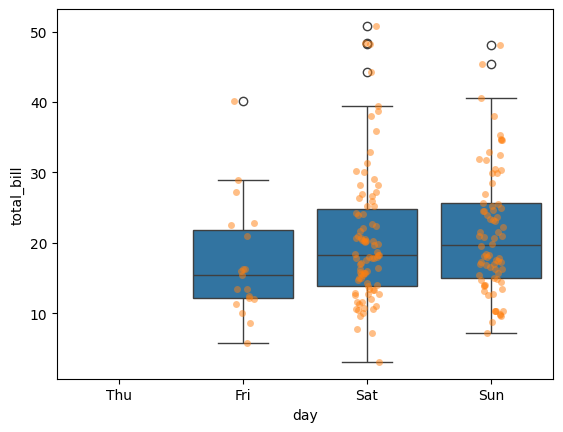

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_tips = sns.load_dataset('tips')
df_tips

fig, ax = plt.subplots()
day_order = ['Thu', 'Fri', 'Sat', 'Sun']
sns.boxplot(x='day', y='total_bill', data=df_tips, ax=ax, order=day_order)
sns.stripplot(x='day', y='total_bill', data=df_tips, ax=ax, order=day_order, alpha=0.5)

## 퀴즈 3: (Plotly Express: px.scatter + trendline + color)

문제: 'Seaborn'이 아닌 'Plotly Express (px)'를 사용하여, df_tips 데이터로 'total_bill' (x축)과 'tip' (y축)의 관계를 그리세요.

px.scatter 함수를 사용하세요.

'smoker'(흡연 여부)에 따라 '색(color)'을 구분하세요.

'smoker'(흡연 여부)별로 '회귀선(trendline)'을 따로 그리세요. (힌트: trendline='ols')

(보너스) '성별(sex)'에 따라 '모양(symbol)'도 다르게 표시해 보세요.

import plotly.express as px

1. 여기에 'px.scatter' 코드 한 줄을 작성하세요.
fig = px.scatter(...)
fig.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df_tips = sns.load_dataset('tips')
df_tips

fig = px.scatter(data_frame = df_tips, x='total_bill', y='tip', width = 400, height = 400, color='smoker', trendline='ols', symbol='sex')
fig.show()

# 판다스 복습 퀴즈


## 퀴즈 1: (select_dtype + def + return + .apply)

문제:

df_quiz에서 데이터 타입(dtype)이 '숫자'(int or float)인 컬럼만 선택하여 df_numeric이라는 새 변수에 저장하세요. (select_dtype 활용)

def를 사용하여, 'Rating'(평점)을 '입구(파라미터)'로 받는 rate_to_grade 함수를 만드세요.

4.0 이상은 'A'

3.0 이상 4.0 미만은 'B'

3.0 미만은 'C'

를 '반환(return)'해야 합니다.

df_quiz의 'Rating' 컬럼에 이 rate_to_grade 함수를 .apply()하여 'Grade'라는 새 컬럼을 추가하고, 최종 df_quiz를 출력하세요.

In [ ]:
import pandas as pd
import numpy as np

data = {
    'InvoiceID': ['A1001', 'A1002', 'B1003', 'C1004', 'C1005', 'D1006', 'D1007', 'A1008'],
    'Team': ['Sales', 'COGS', 'Ops', 'Sales', 'Finance', 'Ops', 'Ops', 'Sales'],
    'Value': [50000, -15000, -8000, 70000, -5000, -2000, 1000, 30000],
    'Rating': [4.5, 3.0, 3.5, 5.0, 2.0, 3.0, 4.0, 4.5],
    'Note': ['Good', 'OK', 'Check', 'Good', 'Bad', np.nan, 'OK', 'Good']
}
df_quiz = pd.DataFrame(data)

df_numeric = df_quiz.select_dtypes(include = [int, float])
def rate_to_grade(value):
  if value >= 4:
    return 'A'
  elif value < 4 and value >= 3:
    return 'B'
  else:
    return 'C'
df_quiz['Grade'] = df_quiz['Rating'].apply(rate_to_grade)
df_quiz

,InvoiceID,Team,Value,Rating,Note,Grade
0,A1001,Sales,50000,4.5,Good,A
1,A1002,COGS,-15000,3.0,OK,B
2,B1003,Ops,-8000,3.5,Check,B
3,C1004,Sales,70000,5.0,Good,A
4,C1005,Finance,-5000,2.0,Bad,C
5,D1006,Ops,-2000,3.0,NaN,B
6,D1007,Ops,1000,4.0,OK,A
7,A1008,Sales,30000,4.5,Good,A


##퀴즈 2: (groupby + ['col'] + def + agg)

문제:

def를 사용하여, 'Value'의 '숫자 덩어리(Series)'를 '입구(파라미터)'로 받는 calc_range 함수를 만드세요.

이 함수는 그 '덩어리'의 '최대값' - '최소값' (즉, 'Range')을 '반환(return)'해야 합니다.

df_quiz를 'Team'별로 그룹화(groupby)하여, 'Value' 컬럼의 '평균(mean)', '개수(count)', 그리고 방금 만든 calc_range 함수 이 3가지를 '동시에' 집계(agg)하세요.

In [ ]:
import pandas as pd
import numpy as np

data = {
    'InvoiceID': ['A1001', 'A1002', 'B1003', 'C1004', 'C1005', 'D1006', 'D1007', 'A1008'],
    'Team': ['Sales', 'COGS', 'Ops', 'Sales', 'Finance', 'Ops', 'Ops', 'Sales'],
    'Value': [50000, -15000, -8000, 70000, -5000, -2000, 1000, 30000],
    'Rating': [4.5, 3.0, 3.5, 5.0, 2.0, 3.0, 4.0, 4.5],
    'Note': ['Good', 'OK', 'Check', 'Good', 'Bad', np.nan, 'OK', 'Good']
}
df_quiz = pd.DataFrame(data)

def calc_range(value):
  return value.max() - value.min()

df_quiz = df_quiz.groupby('Team')['Value'].agg(['mean','count',calc_range])
df_quiz

,mean,count,calc_range
Team,,,
COGS,-15000.0,1,0
Finance,-5000.0,1,0
Ops,-3000.0,3,9000
Sales,50000.0,3,40000


##퀴즈 3: (pd.qcut + | & () 필터링 + .loc)

문제:

pd.qcut을 사용하여, df_quiz의 'Rating' 컬럼을 데이터 개수 기준 2개의 범주('Low', 'High')로 나누어 'Rating_Group'이라는 새 컬럼을 만드세요.

'대괄호 필터링'을 사용하여,

'Rating_Group'이 'Low' 이거나(|)

'Team'이 'Sales' 인 (==)

'모든 행'을 필터링하세요.

필터링된 결과에서, 'InvoiceID'와 'Value' 컬럼만 .loc을 사용하여 출력하세요.

In [ ]:
import pandas as pd
import numpy as np

data = {
    'InvoiceID': ['A1001', 'A1002', 'B1003', 'C1004', 'C1005', 'D1006', 'D1007', 'A1008'],
    'Team': ['Sales', 'COGS', 'Ops', 'Sales', 'Finance', 'Ops', 'Ops', 'Sales'],
    'Value': [50000, -15000, -8000, 70000, -5000, -2000, 1000, 30000],
    'Rating': [4.5, 3.0, 3.5, 5.0, 2.0, 3.0, 4.0, 4.5],
    'Note': ['Good', 'OK', 'Check', 'Good', 'Bad', np.nan, 'OK', 'Good']
}
df_quiz = pd.DataFrame(data)

df_quiz['Rating_Group'] = pd.qcut(df_quiz['Rating'], q=2, labels=['Low','High'])
cond1 = df_quiz['Rating_Group'] == 'Low'
cond2 = df_quiz['Team'] == 'Sales'
df_quiz = df_quiz[cond1 | cond2]
df_quiz = df_quiz.loc[:,['InvoiceID','Value']]
df_quiz

,InvoiceID,Value
0,A1001,50000
1,A1002,-15000
2,B1003,-8000
3,C1004,70000
4,C1005,-5000
5,D1006,-2000
7,A1008,30000
